In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


In [2]:
df = pd.read_csv("Train.csv")

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.shape

(8523, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Categorical values
1.Item_Identifier  
2.Item_Fat_Content  
3.Item_Type 
4.Outlet_Identifier 
5.Outlet_Size         
6.Outlet_Location_Type  
7.Outlet_Type 

In [6]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
df['Item_Weight'].mean()

12.857645184135976

In [8]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

In [9]:
df.iloc[45:55]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
45,FDM39,6.420000,LF,0.089499,Dairy,178.1002,OUT010,1998,NaN,Tier 3,Grocery Store,358.2004
46,NCP05,19.600000,Low Fat,0.000000,Health and Hygiene,153.3024,OUT045,2002,NaN,Tier 2,Supermarket Type1,2428.8384
47,FDV49,10.000000,Low Fat,0.025880,Canned,265.2226,OUT045,2002,NaN,Tier 2,Supermarket Type1,5815.0972
48,FDL12,15.850000,Regular,0.121633,Baking Goods,60.6220,OUT046,1997,Small,Tier 1,Supermarket Type1,2576.6460
49,FDS02,12.857645,Regular,0.255395,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,780.3176
50,NCL17,7.390000,Low Fat,0.067780,Health and Hygiene,143.8812,OUT046,1997,Small,Tier 1,Supermarket Type1,3134.5864
51,FDM40,10.195000,Low Fat,0.159804,Frozen Foods,141.5154,OUT013,1987,High,Tier 3,Supermarket Type1,850.8924
52,FDR13,9.895000,Regular,0.028697,Canned,117.0492,OUT013,1987,High,Tier 3,Supermarket Type1,810.9444
53,FDA43,10.895000,Low Fat,0.065042,Fruits and Vegetables,196.3794,OUT017,2007,NaN,Tier 2,Supermarket Type1,3121.2704
54,NCP18,12.150000,Low Fat,0.028760,Household,151.4708,OUT017,2007,NaN,Tier 2,Supermarket Type1,4815.0656


In [10]:
mode = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]) )

In [11]:
mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [12]:
missing_values = df['Outlet_Size'].isnull()

In [13]:
df.loc[missing_values, 'Outlet_Size'] = df.loc[missing_values, 'Outlet_Type'].apply(lambda x: mode )

In [14]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [28]:
df.iloc[45:55]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
45,FDM39,6.420000,LF,0.089499,Dairy,178.1002,OUT010,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,Tier 3,Grocery Store,358.2004
46,NCP05,19.600000,Low Fat,0.000000,Health and Hygiene,153.3024,OUT045,2002,Outlet_Type Grocery Store Supermarket Type1 Su...,Tier 2,Supermarket Type1,2428.8384
47,FDV49,10.000000,Low Fat,0.025880,Canned,265.2226,OUT045,2002,Outlet_Type Grocery Store Supermarket Type1 Su...,Tier 2,Supermarket Type1,5815.0972
48,FDL12,15.850000,Regular,0.121633,Baking Goods,60.6220,OUT046,1997,Small,Tier 1,Supermarket Type1,2576.6460
49,FDS02,12.857645,Regular,0.255395,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,780.3176
50,NCL17,7.390000,Low Fat,0.067780,Health and Hygiene,143.8812,OUT046,1997,Small,Tier 1,Supermarket Type1,3134.5864
51,FDM40,10.195000,Low Fat,0.159804,Frozen Foods,141.5154,OUT013,1987,High,Tier 3,Supermarket Type1,850.8924
52,FDR13,9.895000,Regular,0.028697,Canned,117.0492,OUT013,1987,High,Tier 3,Supermarket Type1,810.9444
53,FDA43,10.895000,Low Fat,0.065042,Fruits and Vegetables,196.3794,OUT017,2007,Outlet_Type Grocery Store Supermarket Type1 Su...,Tier 2,Supermarket Type1,3121.2704
54,NCP18,12.150000,Low Fat,0.028760,Household,151.4708,OUT017,2007,Outlet_Type Grocery Store Supermarket Type1 Su...,Tier 2,Supermarket Type1,4815.0656


In [15]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [16]:
sns.set()

<Figure size 600x600 with 0 Axes>

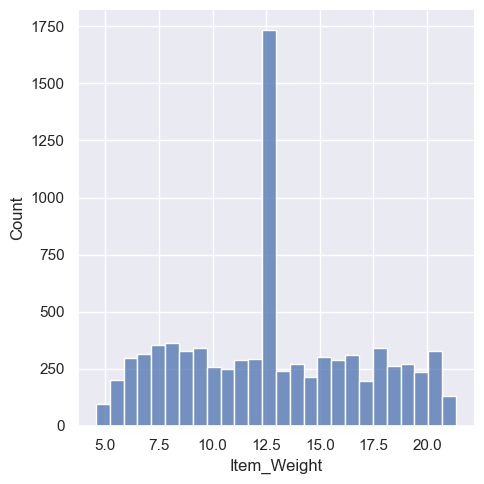

In [17]:
plt.figure(figsize=(6,6))
sns.displot(df['Item_Weight'])
plt.show()

<Figure size 600x600 with 0 Axes>

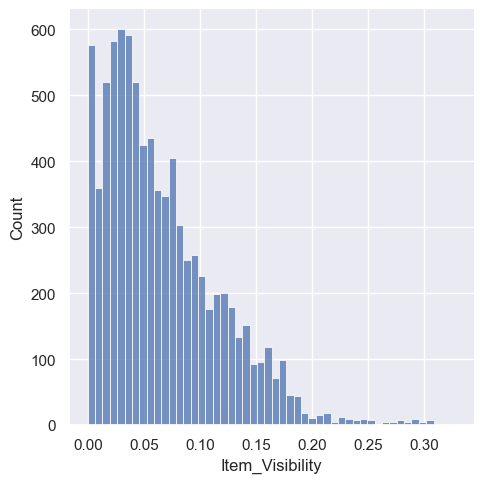

In [18]:
plt.figure(figsize=(6,6))
sns.displot(df['Item_Visibility'])
plt.show()

<Figure size 600x600 with 0 Axes>

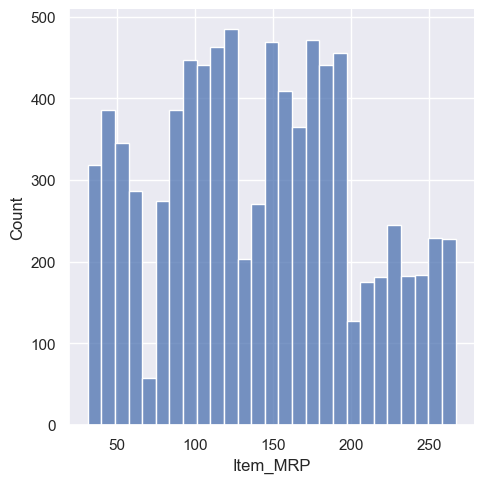

In [19]:
plt.figure(figsize=(6,6))
sns.displot(df['Item_MRP'])
plt.show()

<Figure size 600x600 with 0 Axes>

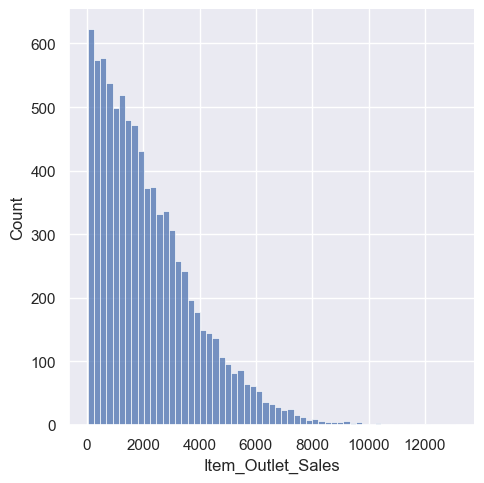

In [20]:
plt.figure(figsize=(6,6))
sns.displot(df['Item_Outlet_Sales'])
plt.show()

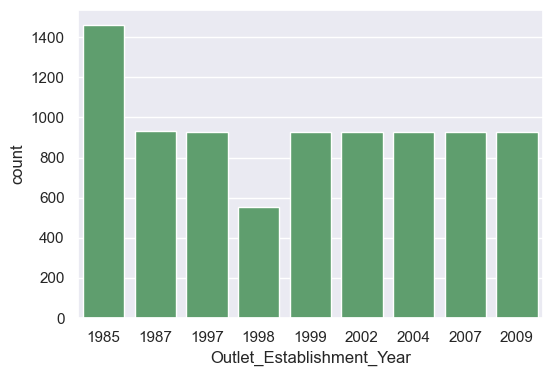

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(x='Outlet_Establishment_Year', data = df, color= 'g')
plt.show()

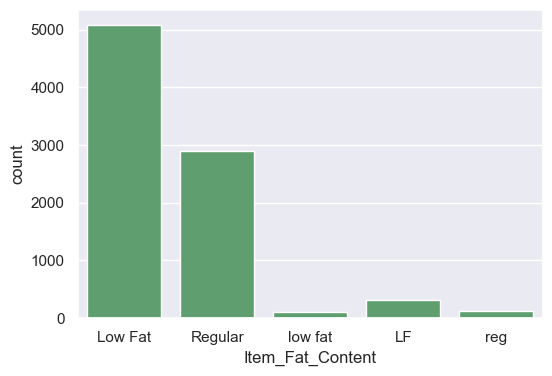

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(x='Item_Fat_Content', data = df, color= 'g')
plt.show()

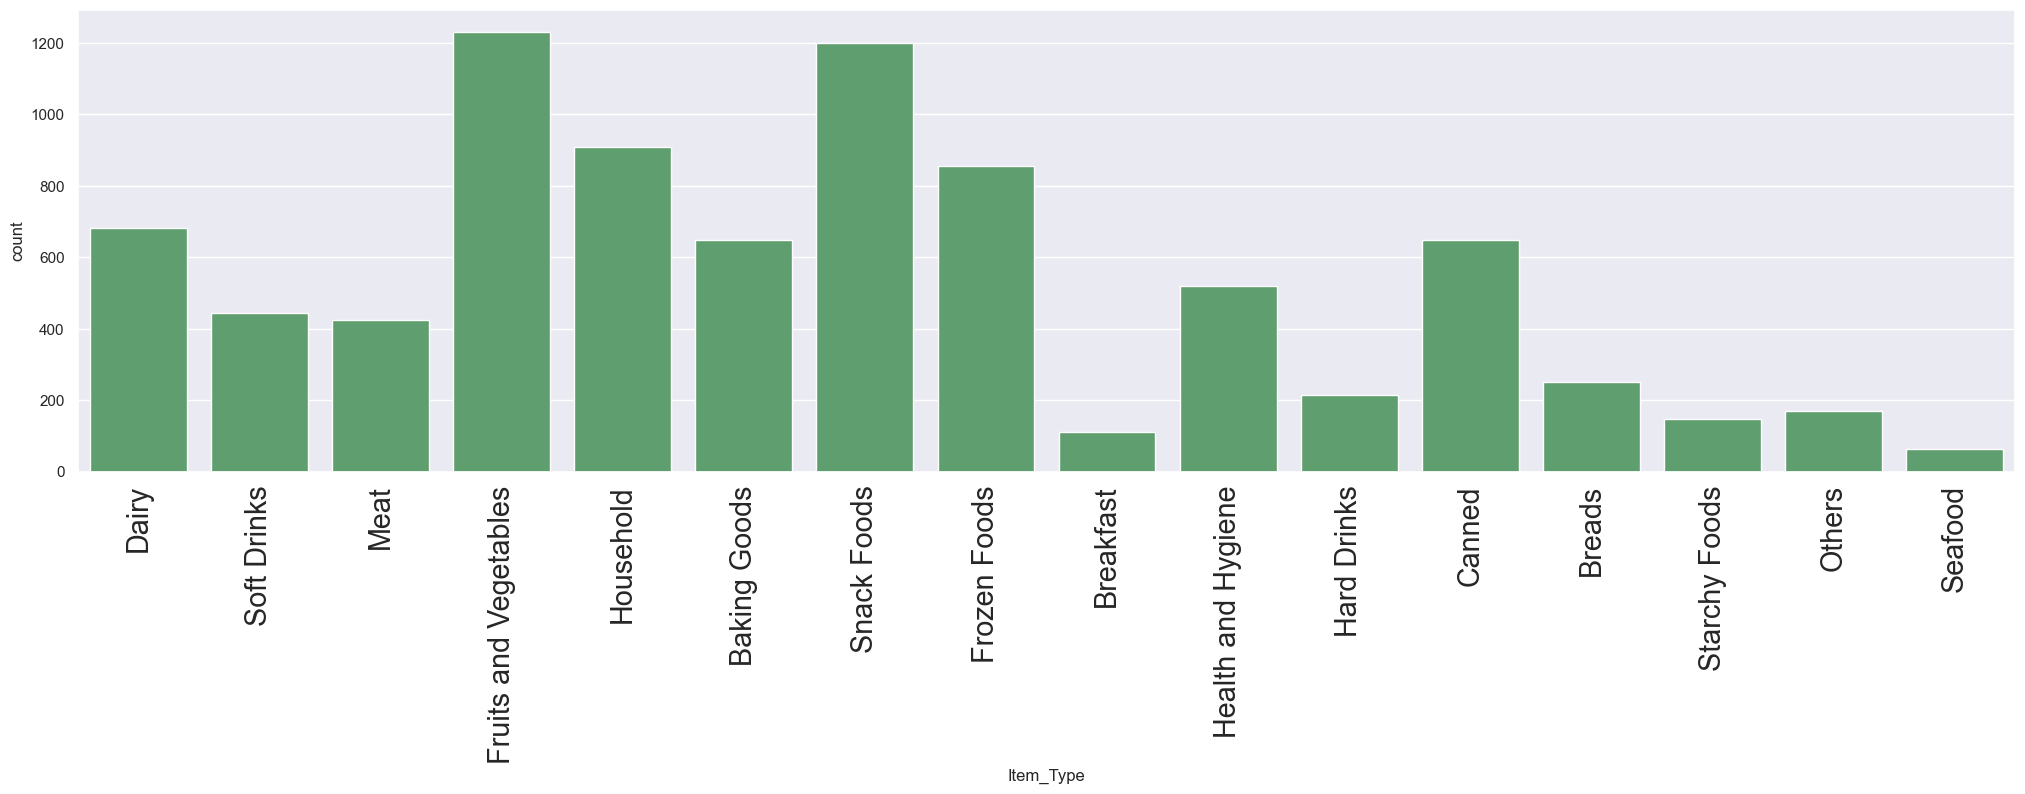

In [23]:
plt.figure(figsize=(25,6))
sns.countplot(x='Item_Type', data = df, color= 'g')
plt.xticks(rotation=90, size='xx-large')  
plt.show()

In [31]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data = df)
plt.show()

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 600x600 with 0 Axes>

# #Data preprocessing

In [36]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [47]:
df.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [48]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [52]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


#Label Encoding

In [49]:
encoder = LabelEncoder()

In [61]:
df['Item_Identifier'] = encoder.fit_transform(df['Item_Identifier'])
df['Item_Fat_Content'] = encoder.fit_transform(df['Item_Fat_Content'])
df['Item_Type'] = encoder.fit_transform(df['Item_Type'])
df['Outlet_Identifier'] = encoder.fit_transform(df['Outlet_Identifier'])

# Convert 'Outlet_Size' column to string type
df['Outlet_Size'] = df['Outlet_Size'].astype(str)

df['Outlet_Size'] = encoder.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type'] = encoder.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type'] = encoder.fit_transform(df['Outlet_Type'])

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [65]:
x = df.drop(['Item_Outlet_Sales'],axis=1)
y = df['Item_Outlet_Sales']

In [67]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [73]:
x_train,  x_test, y_train ,y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [74]:
print(x.shape, x_train.shape, x_test.shape)

(8523, 11) (6818, 11) (1705, 11)


#Machine learning model training

In [75]:
regressor = XGBRegressor()

In [76]:
regressor.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [78]:
#Evaluation
training_data_pred = regressor.predict(x_train)

In [82]:
#R sqaured value
r2_train = metrics.r2_score(y_train, training_data_pred  )
print("R sqaured value = ", r2_train)

R sqaured value =  0.879565708425905


In [83]:
testing_data_pred = regressor.predict(x_test)

In [84]:
r2_test = metrics.r2_score(y_test, testing_data_pred  )
print("R sqaured value = ", r2_test)

R sqaured value =  0.5075841838320172
